# Natural Language Processing on WRI Documents

This notebook presents several wrapper functions to use the Google NLP API to understand structure in WRI documents

Import required libraries

In [255]:
import requests as req
import random
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import subprocess
import glob
import os
from bs4 import BeautifulSoup

Assumed format for results from Google's Natural Language Processing algorithm applied to NDC documents


In [230]:
nlp_result = {
    'noun':'',
    'sentiment':''
}

Will need to write the following functions to connect to Google NLP API:

In [ ]:
def process_documents_to_text_section(original_doc):
    # DO SOMETHING
    document_in_subsections = original_doc
    return document_in_subsections

In [239]:
cmd = ['git', 'clone', 'https://github.com/mengping/ndc.git']
subprocess.check_output(' '.join(cmd), shell=True)

b''

In [253]:
english_ndcs = glob.glob('ndc/*EN.html')
with open(english_ndcs[0], 'r') as f:
    soup = BeautifulSoup(f.read(), 'lxml')
    all_text = ''.join(soup.findAll(text=True))
    print(all_text)

html




GRENADA
Grenada is pleased to present its iNDC pursuant to decision 1 CP/19 and decision 1 CP/20 of the United Nations Framework Convention on Climate Change.
Introduction
Grenada is a small island developing state located in the south eastern Caribbean, made up of several islands all with its own individual characteristics.
Grenada’s total emissions are not significant in the global context with 2010 emissions being 251, 649 tons of CO2 - 0.0005% of total global emission. Notwithstanding this, Grenada is committed to fighting climate change and making its contributions to reducing greenhouse gas emissions in the context of the new legally binding agreement that will be adopted in December 2015 and will be applicable to all parties.
Grenada is committed to a low carbon emission development pathway which would have significant economic benefits as well as reduce its carbon footprint. Historically Grenada has been highly dependent on the importation of fossil fuels to meet its e

In [257]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/nathansuberi/Desktop/WRI_Programming/cred/Resource Watch GEE-b9917062aca7.json'

# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

# Instantiates a client
client = language.LanguageServiceClient()

ContextualVersionConflict: (googleapis-common-protos 1.5.2 (/Users/nathansuberi/.pyenv/versions/3.6.0/lib/python3.6/site-packages), Requirement.parse('googleapis-common-protos<2.0dev,>=1.5.3'), {'google-api-core'})

In [ ]:
def run_nlp_algorithm(document_in_subsections):
    document_results = []
    nlp_api_url = 'https://GOOGLE_NLP_API.com'
    for subsection in document_in_subsections:
        # DO SOMETHING w/ Google NLP API
        document_result = req.get(nlp_api_url, params = {'payload':subsection})
        document_results.append(document_result)
   
    return document_results

Before connection to Google NLP API, simulate random nouns in a document as a demonstration 

This will be switched out for actual algorithm

In [23]:
def pick_random_noun(corpus):
    return lst[math.floor(random.random()*len(corpus))]

def generate_subsection_results(count, corpus):
    subsection_results = []
    for i in range(count):
        res = nlp_result.copy()
        res['noun'] = pick_random_noun(corpus)
        res['sentiment'] = random.random()*2-1
        subsection_results.append(res)
    return subsection_results

def generate_document_results(subsections, corpus):
    document_results = []
    for i in range(subsections):
        num_nouns = math.floor(random.random()*10)
        subsection_results = generate_subsection_results(num_nouns, corpus)
        document_results.append(subsection_results)
        
    for sub in doc_results:
        print(sub)
    return document_results

These functions can be used as-is once doc_results are returned

Small tweaks needed based on structure of Google's Machine Learning API results

In [225]:
def generate_conditional_probabilities(doc_results, corpus):
    counts = np.zeros(len(corpus))
    cooccurences = np.zeros((len(corpus), len(corpus)))
    
    for sub_result in doc_results:
        
        noun_in_this_subsection = np.zeros(len(corpus))
        for res in sub_result:
            ix = corpus.index(res['noun'])
            if noun_in_this_subsection[ix] == 1:
                pass
            else:
                noun_in_this_subsection[ix] = 1
                counts[ix] += 1
            
        cooccured = np.where(noun_in_this_subsection>0)[0]
        for ix_x in cooccured:
            for ix_y in cooccured:
                cooccurences[ix_x, ix_y] += 1
    
    conditional_probabilities = np.nan_to_num(cooccurences / counts.T)
    print(conditional_probabilities)
    return conditional_probabilities

def generate_corpus_links(conditional_probabilities):
    
    corpus_links = np.zeros(conditional_probabilities.shape)
    num_nouns = corpus_links.shape[0]
    
    for ix_x in range(num_nouns):
        for ix_y in range(ix_x):
            prob1 = conditional_probabilities[ix_x, ix_y]
            prob2 = conditional_probabilities[ix_y, ix_x]
            cond_prob = np.min((prob1, prob2))
            corpus_links[ix_x, ix_y] = cond_prob
    
    print(corpus_links)
    return corpus_links

def generate_noun_graph(corpus_links, corpus):
    # For networkx tutorial:
    # https://networkx.github.io/documentation/stable/tutorial.html
    
    # Instantiate Graph
    noun_graph = nx.Graph()
    
    # Create Nodes
    num_nodes = corpus_links.shape[0]
    noun_graph.add_nodes_from(corpus)
    
    # Create Links 
    edge_list = []
    for ix_x in range(num_nodes):
        for ix_y in range(ix_x):
            node_x = corpus[ix_x]
            node_y = corpus[ix_y]
            edge_list.append((node_x, node_y, {'weight':corpus_links[ix_x, ix_y]}))
    noun_graph.add_edges_from(edge_list)        
    
    # Draw graph
    nx.draw_networkx(noun_graph, pos=nx.spring_layout(noun_graph))
    plt.draw()
    
    return noun_graph

def generate_minimum_spanning_tree_plus(noun_graph, corpus_links, cutoff):
    # Generate minimum spanning tree
    mst = nx.minimum_spanning_tree(noun_graph)
   
    # Enforce that all links with weight above the cutoff are included
    edge_list = []
    for ix_x in range(corpus_links.shape[0]):
        for ix_y in range(ix_x):
            link_weight = corpus_links[ix_x, ix_y]
            if link_weight > cutoff:
                node_x = corpus[ix_x]
                node_y = corpus[ix_y]
                edge_list.append((node_x, node_y, {'weight':link_weight}))
    mst.add_edges_from(edge_list)
    
    # Draw graph
    nx.draw_networkx(mst, pos=nx.spring_layout(mst))
    plt.draw()
    
    return mst

Demo

In [222]:
print("Corpus:")
corpus = ['cat', 'dog', 'health', 'safety', 'community', 'family', 'besties', 'enemies', 'crystal', 'shard', 'farce']
print(corpus)
print()

print("Doc Results:")
doc_results = generate_document_results(5, corpus)
print()

print("Conditional Probabilities:")
conditional_probabilities = generate_conditional_probabilities(doc_results, corpus)
print()

print("Corpus Links:")
corpus_links = generate_corpus_links(conditional_probabilities)

Corpus:
['cat', 'dog', 'health', 'safety', 'community', 'family', 'besties', 'enemies', 'crystal', 'shard', 'farce']

Doc Results:
[{'noun': 'shard', 'sentiment': -0.16071689869937522}, {'noun': 'health', 'sentiment': 0.5549086818526696}, {'noun': 'farce', 'sentiment': 0.43493538343980687}, {'noun': 'family', 'sentiment': 0.7647536712459819}, {'noun': 'besties', 'sentiment': -0.6529173476267538}, {'noun': 'farce', 'sentiment': 0.786680975144892}, {'noun': 'farce', 'sentiment': 0.8094043469960428}]
[{'noun': 'community', 'sentiment': -0.14343071823731535}, {'noun': 'cat', 'sentiment': 0.38051663302883254}, {'noun': 'community', 'sentiment': -0.17274894572764277}, {'noun': 'farce', 'sentiment': -0.6803547487348691}, {'noun': 'cat', 'sentiment': -0.8180906325154207}, {'noun': 'community', 'sentiment': -0.5108851722548269}, {'noun': 'dog', 'sentiment': -0.4139399859514512}]
[{'noun': 'cat', 'sentiment': 0.5554400904334709}, {'noun': 'community', 'sentiment': 0.2802734736972061}]
[]
[{'noun

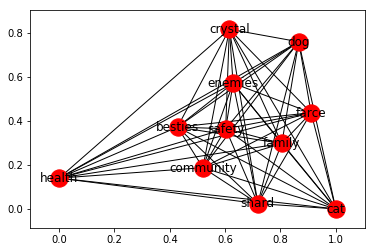

In [223]:
# Full noun_graph
noun_graph = generate_noun_graph(corpus_links, corpus)

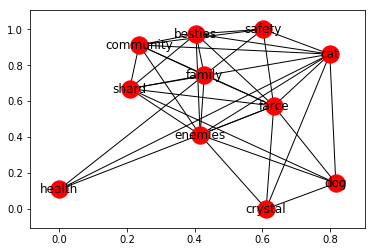

In [226]:
# Minimal spanning tree with additional links based on cutoff
cutoff = .5
mstp = generate_minimum_spanning_tree_plus(noun_graph, corpus_links, cutoff)

# Extensions

* Extract neighborhoods from pruned graph
* Differentiate between proper and common nouns - highlight proper nouns to discuss the issues they care about
* Incorporate sentiment in some measure